In [8]:
import pandas as pd
import numpy as np

# target_csv = "../scoring_results/alphabet/random_query_temperature_0.01_sample_n_30_random_str_length_0_11_22_02_12_28_results.csv"
target_csv = "../scoring_results/alphabet/random_query_temperature_0.01_sample_n_30_random_str_length_280_12_23_10_22_50_results.csv"

In [9]:
result_df = pd.read_csv(target_csv)

def extract_label_and_scores():
    
    df = result_df.copy()    

    df  = df[['qid','factuality','pr_score','re_score','f1_score']]
    
    label_and_scores = {
        'label':[],
        'pr':[],
        're':[],
        'f1':[]
    }
    
    for i in range(df.shape[0]):
        labels = df.iloc[i]['factuality'].split(',')
        pr_scores = df.iloc[i]['pr_score'].split(',')
        re_scores = df.iloc[i]['re_score'].split(',')
        f1_scores = df.iloc[i]['f1_score'].split(',')
        
        labels = [1 - int(x) for x in labels]
        pr_scores = [float(x) for x in pr_scores]
        re_scores = [float(x) for x in re_scores]
        f1_scores = [float(x) for x in f1_scores]
        
        assert len(labels) == len(pr_scores), f"labels: {labels}, pr_scores: {pr_scores},i: {i}"
        
        label_and_scores['label'].extend(labels)
        label_and_scores['pr'].extend(pr_scores)
        label_and_scores['re'].extend(re_scores)
        label_and_scores['f1'].extend(f1_scores)
        

    return label_and_scores

In [10]:
# AUC scoreを計算   
from sklearn.metrics import roc_auc_score
label_and_scores = extract_label_and_scores()

In [11]:

aucs = {
    'pr':roc_auc_score(label_and_scores['label'],label_and_scores['pr']),
    're':roc_auc_score(label_and_scores['label'],label_and_scores['re']),
    'f1':roc_auc_score(label_and_scores['label'],label_and_scores['f1']),
}

aucs

{'pr': 0.7243243243243243, 're': 0.6693008225616921, 'f1': 0.7014688601645124}

In [12]:
scores = label_and_scores['pr']
labels = label_and_scores['label']
scores = np.array(scores)
labels = np.array(labels)

df_score_label = pd.DataFrame({'score':scores,'label_int':labels})
df_score_label["label"] = "tekito"

for i in range(df_score_label.shape[0]):
    if df_score_label.iloc[i]['label_int'] == 0:
        df_score_label.at[i,'label'] = "Factual"
    else:
        df_score_label.at[i,'label'] = "Hallucinated"

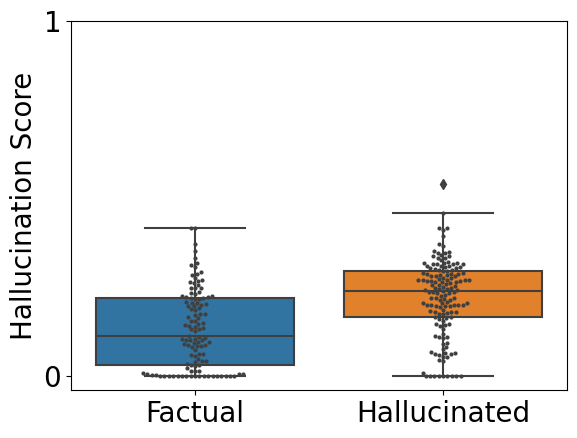

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# font sizeを14に設定
plt.rcParams.update({'font.size': 20})
# 軸は整数に設定
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# 箱ひげ図
sns.boxplot(x="label", y="score", data=df_score_label,order=["Factual","Hallucinated"])
sns.swarmplot(x="label", y="score", data=df_score_label, color=".25", size=3,order=["Factual","Hallucinated"])
plt.xlabel("")
plt.ylabel("Hallucination Score")
plt.ylim(-0.04,1)
plt.show()



In [7]:
import seaborn as sns